# Банки — Сегментация пользователей по потреблению.

## Материалы

* Презентация https://disk.yandex.ru/i/kdtJ3SJaKeKjIg
* Дашборд  https://public.tableau.com/app/profile/.35532716/viz/project_bank_16596096792850/Dashboard1?publish=yes

## Описание проекта.

Необходимо проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов.

**`Цель проекта`** - проанализировать отток клиентов, предположить возможные причины оттока.

**`Задачи проекта`**
   - Провести исследовательский анализ данных;
   - Сегментировать пользователей на основе данных о количестве потребляемых продуктов;
   - Сформулировать и проверить статистические гипотезы;
   - Проверить гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним;
   - Сформулировать и проверить статистическую гипотезу относительно представленных данных.


**Описание данных**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Загрузка данных, изучение общей информации.

### Импортируем нужные библиотеки и загрузим данные

In [118]:
import pandas as pd
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore') 

from scipy import stats as st
from plotly import graph_objects as go

In [119]:
#откроем файл с данными, ознакомимся с ними
data = pd.read_csv('/datasets/bank_dataset.csv')
data

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


#### Вывод

Просмотрев данные мы видим, что некоторые названия колонок указаны некорректно, их необходимо привести к нижнему змеинному регистру. Также видим, что в данных имеются пропущенные значения.

### Изучим общую информацию

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


#### Вывод

В колонке **balance** мы видим большую часть пропущенных значений, в остальных колонках данные представлены в полном объеме. В данных мы видим бинарную замену категориальных признаков.

### Вывод

* Мы подгрузили необходимые для работы библиотеки, прочитали файл и ознакомились с данными. Сразу бросается в глаза некорректное наименование колонок, все названия необходимо привести к нижнему змеиному регистру. 


* При помощи метода info() мы ознакомились с основной информацией по данным и увидели,  что в данных присутствует бинарная замена категориальных признаков.

## Предобработка данных.

### Преобразуем наименований колонок

In [121]:
#приведем названия таблицы к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [122]:
#приведем названия колонок таблицы к змеинному регистру

data = data.rename(columns = {
'creditcard':'credit_card',
'userid':'user_id'
})

data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

#### Вывод

При помощи методов columns и rename мы привели названия колонок к нижнему змеинному регистру. Теперь наименования указаны корректно.

### Создадим новый столбец с навзаниями параметров оттока

Это необходимо нам для корректного создания фильтрации в дашборде.

In [123]:
#создадим функцию, которая принимает на вход один параметр (показатель оттока) и на выходе дает присваивает ему название

def churn (value):

    if value == 0:
        return 'Остался'
    elif value == 1:
        return'Ушел'

In [124]:
#создадим новый столбец с названиями по оттоку, при помощи метода apply() передадим функции churn столбец 'churn'

data['churn_new'] = data['churn'].apply(churn)

#### Вывод

При помощи функции и метода apply() мы создали новый столбец с названиями по оттоку.

### Проверим данные на пропущенные значения

In [125]:
data.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
churn_new              0
dtype: int64

In [126]:
#подсчитаем процент пропусков в колонке balance

3617/len(data['balance'])*100

36.17

**Посмотрим на кол-во пропусков в различных разрезах**

In [127]:
#проверим, влияет ли статус активности клиента на кол-во пропусков в колонке balance

loyalty = data[data['loyalty']==1][['balance','city']]
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151 entries, 0 to 9997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   balance  3278 non-null   float64
 1   city     5151 non-null   object 
dtypes: float64(1), object(1)
memory usage: 120.7+ KB


In [128]:
#проверим, влияет ли статус активности клиента на кол-во пропусков в колонке balance

loyalty = data[data['loyalty']==0][['balance','city']]
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 2 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   balance  3105 non-null   float64
 1   city     4849 non-null   object 
dtypes: float64(1), object(1)
memory usage: 113.6+ KB


>У клиентов с разным статусом активности примерно равное кол-во пропусков в колонке balance

In [129]:
#проверим, влияет ли наличие кредитной карты у клиента на кол-во пропусков в колонке balance

loyalty = data[data['credit_card']==0][['balance','city']]
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2945 entries, 1 to 9997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   balance  1920 non-null   float64
 1   city     2945 non-null   object 
dtypes: float64(1), object(1)
memory usage: 69.0+ KB


In [130]:
#проверим, влияет ли наличие кредитной карты у клиента на кол-во пропусков в колонке balance

loyalty = data[data['credit_card']==1][['balance','city']]
loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7055 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   balance  4463 non-null   float64
 1   city     7055 non-null   object 
dtypes: float64(1), object(1)
memory usage: 165.4+ KB


> У клиентов, которые имеют кредитную карту, имеется существенное кол-во (70%) пропусков в колонке balance. Можно предположить, что данные клиенты живут засчет кредитки, соответственно на счету отсутствуют средства :(

#### Вывод

При помощи методов isna() и sum() мы проверили данные на пропуски и подсчитали их кол-во. В колонке balance мы обнаружили существенное кол-во пропусков (чуть менее 40%). Мы не будем заменять данные значения на нули, т.к. в этом случае в дальнейшем анализе на наших графиках появятся выбросы, а также у нас нет необходимости создавать  модель, поэтому пропуски не помешают для выполнения задачи. Оставим их, как есть. Мы проанализировали данные в различных разрезах и выяснили, что у клиентов, которые имеют кредитную карту, имеется существенное кол-во пропусков в колонке balance. Можно предположить, что данные клиенты живут засчет кредитки, соответственно на счету отсутствуют средства.

### Проверим данные на явные дубликаты

In [131]:
data.duplicated().sum()

0

#### Вывод

При помощи метода duplicated() мы проверили данные на явные дубликаты. Явных дубликатов не обнаружено.

### Проверим данные на неявные дубликаты

In [132]:
data['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

In [133]:
data['gender'].value_counts()

М    5457
Ж    4543
Name: gender, dtype: int64

#### Вывод

При помощи метода value_counts() мы проверили на неявные дубликаты колонки с типом данных object. Неявных дубликатов не обнаружено.

### Вывод

* Мы преобразовали названия колонок, привели к нижнему регистру методом str.lower(), а также привели к змеинному регистру при помощи метода rename(). 


* При помощи методов isna(), duplicated(), sum() мы провели предобработку данных - явных и неявных дубликатов в данных не обнаружено. В колонке balance мы обнаружили существенное кол-во пропусков. Такая ситуация могла возникнуть в связи с тем, что у данных клиентов на счету не было средств. Мы не будем заменять данные значения на нули, т.к. в этом случае в дальнейшем анализе на наших графиках появятся выбросы, а также у нас нет необходимости создавать модель, поэтому пропуски не помешают для выполнения задачи. Оставим пропуски как есть. 

## Исследовательский анализ данных.

### Изучим средние значения и стандартные отклонения датасета

In [134]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
user_id,10000.0,15733676.57,71936.19,15608437.00,15671264.25,15733474.00,15795969.75,15858426.00
score,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
objects,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,6383.0,119827.49,30095.06,3768.69,100181.98,119839.69,139512.29,250898.09
products,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
loyalty,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
churn,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


#### Вывод

Изучив средние значения и стандартные отклонения при помощи метода describe(), можно сделать выводы:

* Средний балл кредитного скоринга составляет **650**
* Средний возраст клиентов **38 лет**
* Клиенты банка имеют в среднем **5 объектов собственности**
* Средний баланс на счетах клиентов **119827**
* В среднем клиенты банка имеют один продукт
* Больше, чем у **70%** клиентов имеется кредитная карта
* **51%** клиентов являются активными
* В среднем заработная плата клиента составляет **100090**
* Отток клиентов равен **20%**.

### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [135]:
for column in data.columns:
    df = data.groupby('churn').mean()


df = df.T.round(2)
df.columns = ['оставшиеся', 'ушедшие']
df

,оставшиеся,ушедшие
user_id,15733903.88,15732787.96
score,651.85,645.35
age,37.41,44.84
objects,5.03,4.93
balance,119535.86,120746.97
products,1.54,1.48
credit_card,0.71,0.70
loyalty,0.55,0.36
estimated_salary,99738.39,101465.68


#### Вывод

Для группировки данных по оттоку с средними значениями признаков мы создали цикл и применили методы groupby() и mean(). В разрезе по группам пользователей  оставшимся и ушедшим можно сделать выводы:

* У ушедших клиентов **средний бал кредитного скоринга ниже, а возраст выше**
* По кол-ву объектов в собственности и количеству продуктов существенной разницы между группами не наблюдается
* Средний баланс на счете у ушедших клиентов немного выше 
* У 70% в обеих группам имеется кредитная карта
* Среди ушедших клиентов  всего **36% являлись активными**
* Средняя заработная плата ушедших клиентов немного выше.

### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [136]:
#выделим датасет только с количественными признаками
df1 = data.drop(['user_id','city', 'gender', 'credit_card', 'loyalty', 'churn'], axis = 1)

In [137]:
#выделим датасет только с качественными признаками
df2 = data.drop(['user_id', 'churn','score','age','objects', 'balance', 'products',
                  'estimated_salary'], axis = 1)

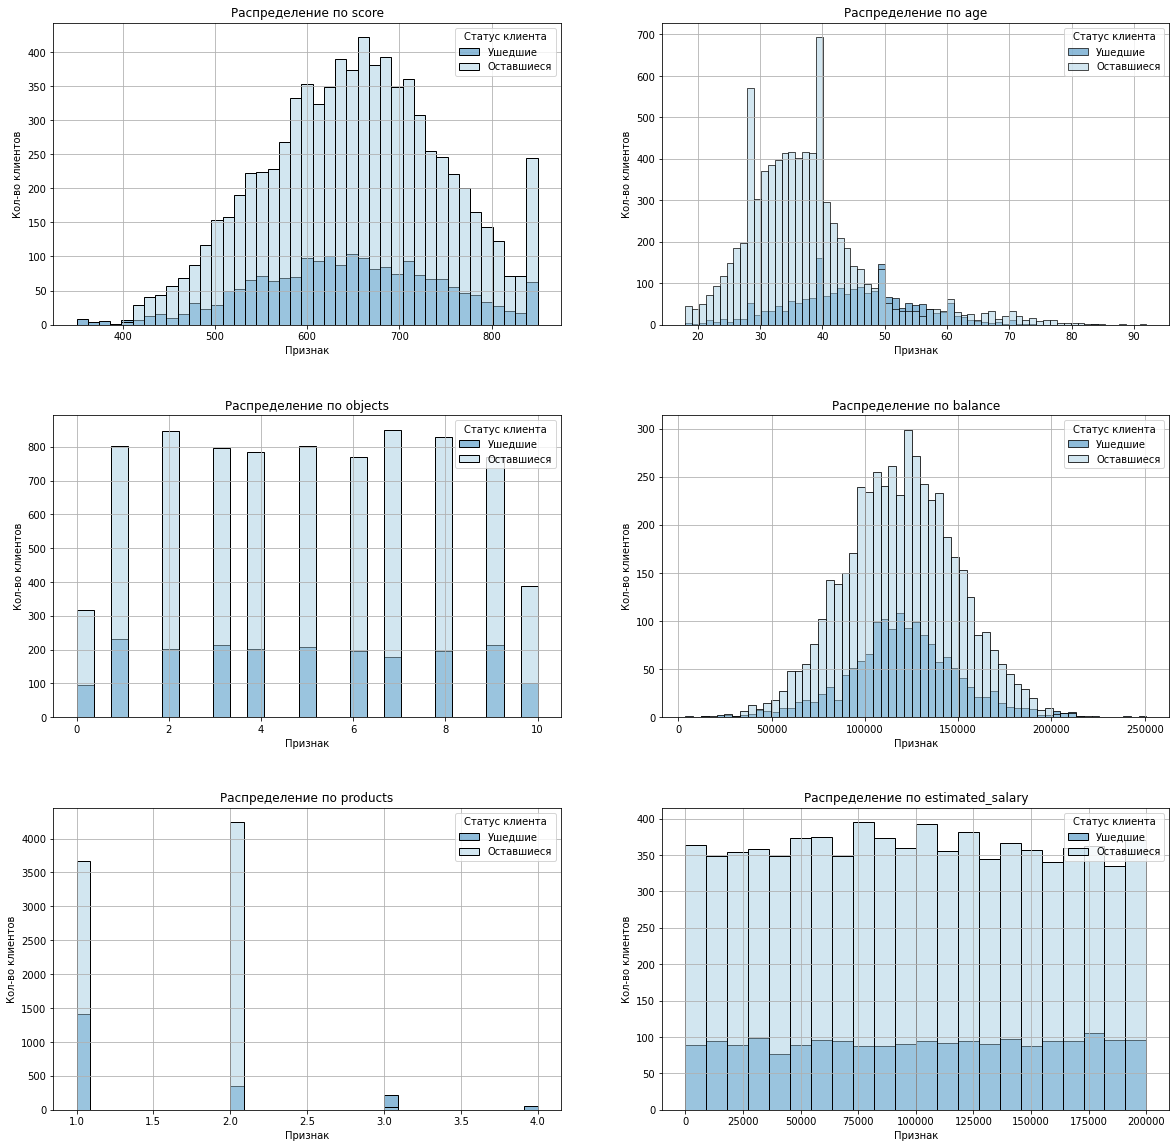

In [138]:
#построим гистограммы распределения методом histplot() для количественных признаков

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
plt.subplots_adjust(hspace=0.3)

for col, ax in zip(df1.columns, axs.ravel()):
    hp = sns.histplot(data=data, x=col, hue='churn', palette="Paired", ax=ax)
    
    hp.legend(title='Статус клиента', labels=['Ушедшие', 'Оставшиеся'])
    ax.grid()
    ax.set_title(f'Распределение по {col}')
    ax.set_xlabel('Признак')
    ax.set_ylabel('Кол-во клиентов')

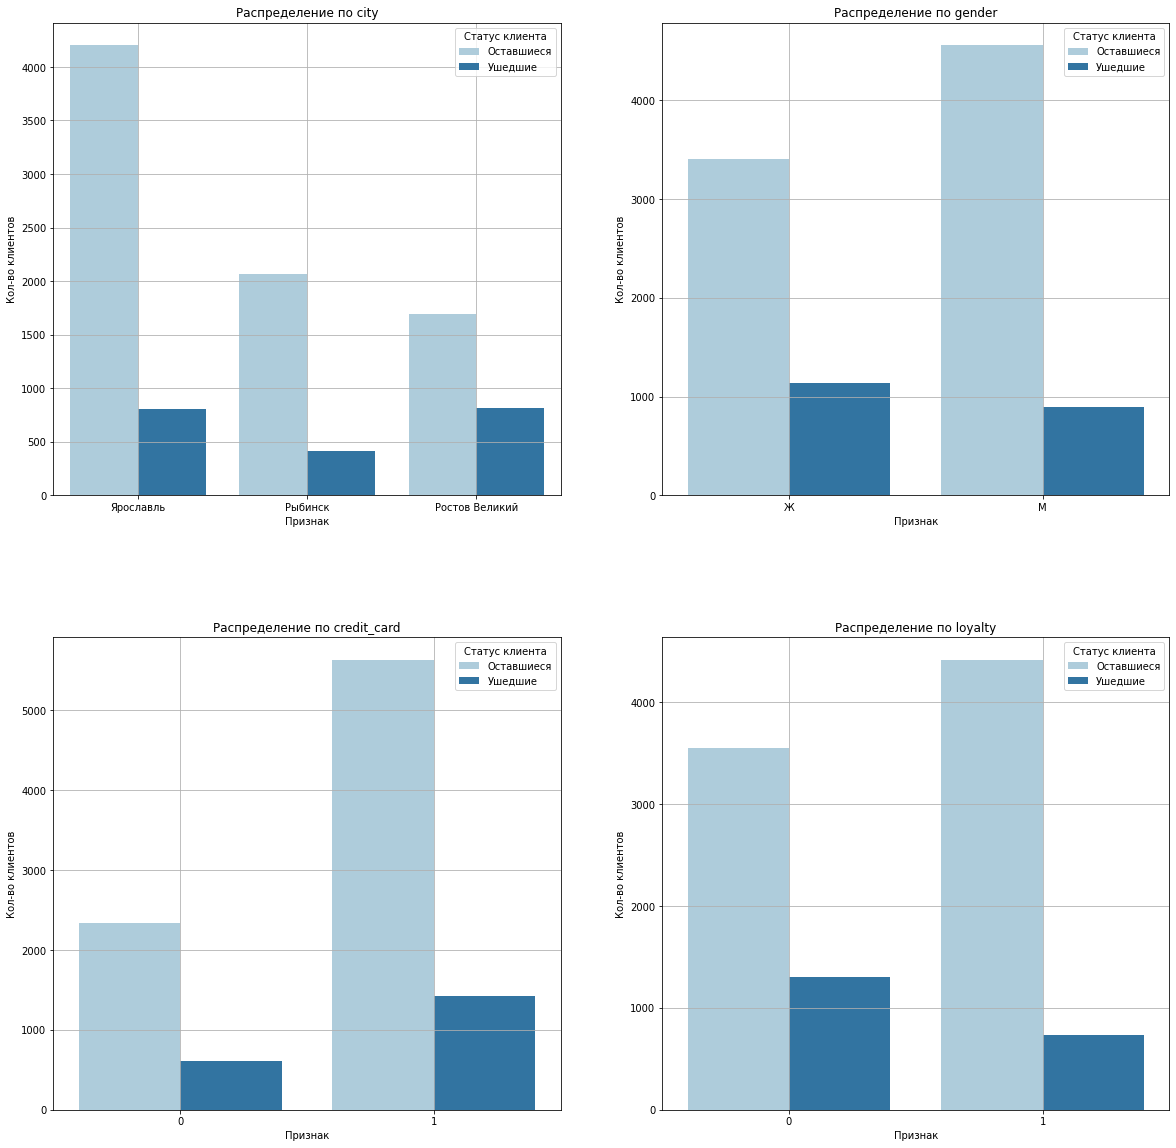

In [139]:
#построим гистограммы распределения методом countplot() для качественных признаков

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

plt.subplots_adjust(hspace=0.3)

for col, ax in zip(df2.columns, axs.ravel()):
    cp = sns.countplot(data=data, x=col, hue='churn', palette="Paired", ax=ax)
    cp.legend(title='Статус клиента', labels=['Оставшиеся', 'Ушедшие'])
    ax.grid()
    ax.set_title(f'Распределение по {col}')
    ax.set_xlabel('Признак')
    ax.set_ylabel('Кол-во клиентов')

#### Вывод

Применив методы histplot() и countplot() мы построили графики по количественным и неколичественным признакам.

Проанализировав графики выше, можно дополнить выводы:

* Возраст большинства ушедших клиентов составляет **40+**
* Большее кол-во ушедших клиентов имели в банке всего **один продукт**
* Больше всего ушедших отмечается по **г. Ростов Великий**
* Ушедших **женщин** больше, чем мужчин

Можно предположить, что среди ушедших преобладают клиенты более старшего возраста, в связи с тем, что банк возможно ориентирован на более молодую аудиторию. Стоит также задуматься, почему ушедшие клиенты имели всего один продукт, возможно банк предоставляет мало продуктов с бесплатным обслуживанием на пробный период. 

### Построим матрицу корреляций.

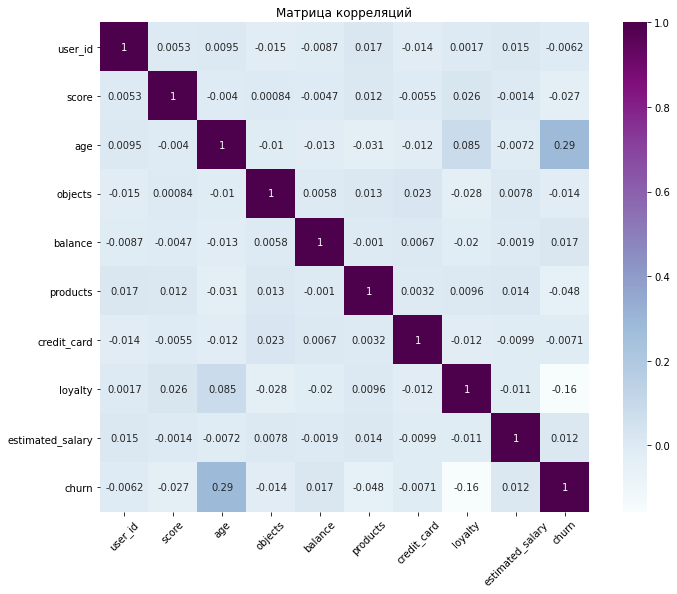

In [140]:
#построим матрицу корреляций

plt.figure(figsize=(12,9))
sns.heatmap(data = data.corr(), annot=True, cmap='BuPu', square=True)
plt.title('Матрица корреляций')
plt.xticks(rotation = 45)
plt.show()

При помощи метода corr() мы построили матрицу корреляций и  методом heatmap() отобразили её в виде тепловой карты. Матрица корреляций указывает, что явной зависимости оттока от других признаков не наблюдается. 

Исследуем зависимость признаков в разрезе городов. Затем построим матрицу корреляций, расчитанную методом Спирмена.

In [141]:
# закодируем признак city one-hot кодировкой, чтобы избежать некорректных расчетов 

data_city = pd.get_dummies(data, columns=['city'])
data_city.head()

,user_id,score,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,churn_new,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,Ж,42,2,NaN,1,1,1,101348.88,1,Ушел,0,0,1
1,15690047,608,Ж,41,1,83807.86,1,0,1,112542.58,0,Остался,0,1,0
2,15662040,502,Ж,42,8,159660.80,3,1,0,113931.57,1,Ушел,0,0,1
3,15744090,699,Ж,39,1,NaN,2,0,0,93826.63,0,Остался,0,0,1
4,15780624,850,Ж,43,2,125510.82,1,1,1,79084.10,0,Остался,0,1,0


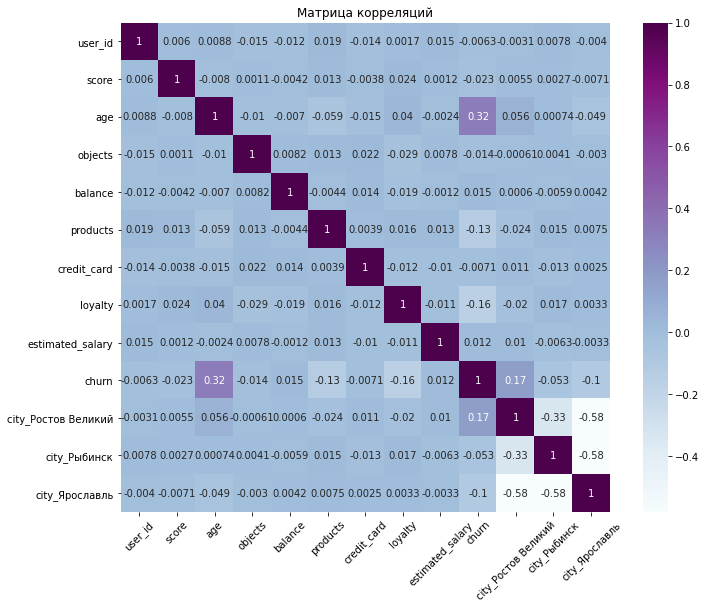

In [142]:
#построим матрицу корреляций, применив метод Спирмена

plt.figure(figsize=(12,9))
sns.heatmap(data = data_city.corr(method='spearman'), annot=True, cmap='BuPu', square=True)
plt.title('Матрица корреляций')
plt.xticks(rotation = 45)
plt.show()

Матрица корреляции, расчитанная методом Спирмена также показывает, что явных взаимосвязей нет.

#### Вывод

При помощи метода corr() мы построили матрицу корреляций и  методом heatmap() отобразили её в виде тепловой карты. Матрица корреляций указывает, что явной зависимости оттока от других признаков не наблюдается.  Матрица корреляции, расчитанная методом Спирмена также показывает, что явных взаимосвязей нет.

### Вывод

Изучив средние значения и стандартные отклонения, мы определили:

* Средний балл кредитного скоринга составляет **650**
* Средний возраст клиентов **38 лет**
* Клиенты банка имеют в среднем **5 объектов собственности**
* Средний баланс на счетах клиентов **119827**
* В среднем клиенты банка имеют один продукт
* Больше, чем у **70%** клиентов имеется кредитная карта
* **51%** клиентов являются активными
* В среднем заработная плата клиента составляет **100090**
* Отток клиентов равен **20%**.

В разрезе по группам пользователей  оставшимся и ушедшим отметили, что:

* У ушедших клиентов **средний бал кредитного скоринга ниже, а возраст выше**
* По кол-ву объектов в собственности и количеству продуктов существенной разницы между группами не наблюдается
* Средний баланс на счете у ушедших клиентов немного выше 
* У **70%** в обеих группам имеется кредитная карта
* Среди ушедших клиентов  всего **36% являлись активными**
* Средняя заработная плата ушедших клиентов немного выше.

Проанализировав графики выше, можно дополнить выводы:

* Возраст большинства ушедших клиентов составляет **40+**
* Большее кол-во ушедших клиентов имели в банке всего **один продукт**
* Больше всего ушедших отмечается по **г. Ростов Великий**
* Ушедших **женщин** больше, чем мужчин

Можно предположить, что среди ушедших преобладают клиенты более старшего возраста, в связи с тем, что банк возможно ориентирован на более молодую аудиторию. Стоит также задуматься, почему ушедшие клиенты имели всего один продукт, возможно банк предлагает мало продуктов с бесплатным обслуживанием на пробный период. 

Матрица корреляций указывает, что явной зависимости оттока от других признаков не наблюдается.

## Сегментирование пользователей на основе данных о количестве потребляемых продуктов.

### Выделим сегменты клиентов на основе кол-ва продуктов. 

In [143]:
#Воспользуемся функцие grouby() и count()

data.groupby('products').agg({'user_id':'nunique'})

,user_id
products,
1,5084
2,4590
3,266
4,60


Итак, мы видим, что наши клиенты подразделяются на 4 сегмента, наибольшее кол-во клиентов обладают всего одним продуктом, чуть меньше обладают двумя продуктами, существенно меньшее кол-во клиентов, обладают тремя и четырьмя продуктами. Присвоим нашим сегментам названия: **Сегмент 1** назовем - **Обычные клиенты**, **Сегмент 2 - Активные клиенты**, **Сегмент 3 - Продвинутые клиенты**, **Сегмент 4 - VIP-клиенты**, затем создадим новый столбец с названиями наших сегментов. Для этого напишем функцию segment.

In [144]:
def segment (product):
    """Эта функция присваивает название сегмента.
    
    Функция принимает на вход один параметр и согласно условиям выводит название сегменты.
    """
    if product == 1:
        return 'Обычные клиенты'
    elif product == 2:
        return'Активные клиенты'
    elif product == 3:
        return 'Продвинутые клиенты'
    elif product == 4:
        return 'VIP - клиенты'

In [145]:
#при помощи метода apply() передадим функции столбец products

data['segments'] = data['products'].apply(segment)

In [146]:
#проверим, что все получилось

seg = data.groupby('segments').agg({'user_id':'nunique'})
seg = seg.sort_values(by='user_id', ascending=False).reset_index()
seg.columns = ['segment','count_clients']
seg

,segment,count_clients
0,Обычные клиенты,5084
1,Активные клиенты,4590
2,Продвинутые клиенты,266
3,VIP - клиенты,60


In [147]:
#построим круговую диаграмму

fig = go.Figure()

fig.add_trace(go.Pie(values=seg.count_clients, labels=seg.segment))

fig.update_layout(title='Соотношение клиентов по сегментам',
                 height=500,
                 width=500
                 )
fig.show()

#### Вывод

При помощи функции segment мы ведилили 4 сегмента клиентов: **Обычные клиенты, Активные клиенты, Продвинутые клиенты и VIP-клиенты.** Основная часть клиентов приходится на сегмент "Обычные клиенты" - 51%, 46% приходится на сегмент "Активные клиенты", 3% приходится на сегмент "Продвинутые клиенты", менее 1% представляет сегмент "VIP-клиенты".

### Посмотрим на средние значения признаков для сегментов и опишем сегменты

In [148]:
# выводим статистику по средним значениям наших признаков по сегментам
segments = data.groupby('segments').mean().reset_index().drop(columns=['user_id', 'products'])
numeric_columns = segments.drop(columns=['segments']).columns

# подсветим минимальные и максимальные значения по каждому показателю
segments.style.format({i: '{:.3f}' for i in numeric_columns}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns) \
    .highlight_min(color='coral', subset=numeric_columns)

,segments,score,age,objects,balance,credit_card,loyalty,estimated_salary,churn
0,VIP - клиенты,653.583,45.683,5.300,122260.611,0.683,0.483,104763.723,1.000
1,Активные клиенты,652.189,37.754,5.052,119660.944,0.707,0.533,100452.013,0.076
2,Обычные клиенты,649.121,39.673,4.975,119894.164,0.704,0.504,99487.257,0.277
3,Продвинутые клиенты,648.105,43.195,5.004,119475.686,0.714,0.425,104318.131,0.827


#### Вывод

Опишем сегменты:

* У **VIP - клиентов** наибольший балл кредитного скоринга, наивысший средний возраст, наибольшее кол-во объектов в собственности, самый высокий средний баланс на счете, все клиенты из данного сегмента попали в отток.
* У **Активных клиентов** самый низкий процент оттока, самый низкий средний возраст и наивысший показатель активных клиентов.
* У **Обычных клиентов** самый низкий показатель средней заработной платы.
* У **Продвинутых клиентов** самый низкий балл кредитного скоринга, самый низкий средний баланс на счете, наибольший процент клиентов имеет кредитную карту, самый низкий процент клиентов по активности.

Таким образом можно заметить, что довольно значимый для банка сегмент **VIP-клиенты** имеет 100% отток. Это может быть связано с невыгодными условиями (высокой комиссией за пользование продуктами, низкими процентами по вкладам). Также можно предположить, что для данного сегмента в банке осуществляется недостаточно хорошее обслуживание (нет личного менеджера, общий зал ожидания, мало индивидуальных предложений).

### Построим распределения признаков для сегментов

In [149]:
#выделим датасет только с количественными признаками
df1_s = data.drop(['user_id','city', 'gender', 'credit_card', 'loyalty', 'churn'], axis = 1)

In [150]:
#выделим датасет только с качественными признаками
df2_s = data.drop(['user_id', 'churn','score','age','objects', 'balance', 'products',
                  'estimated_salary'], axis = 1)

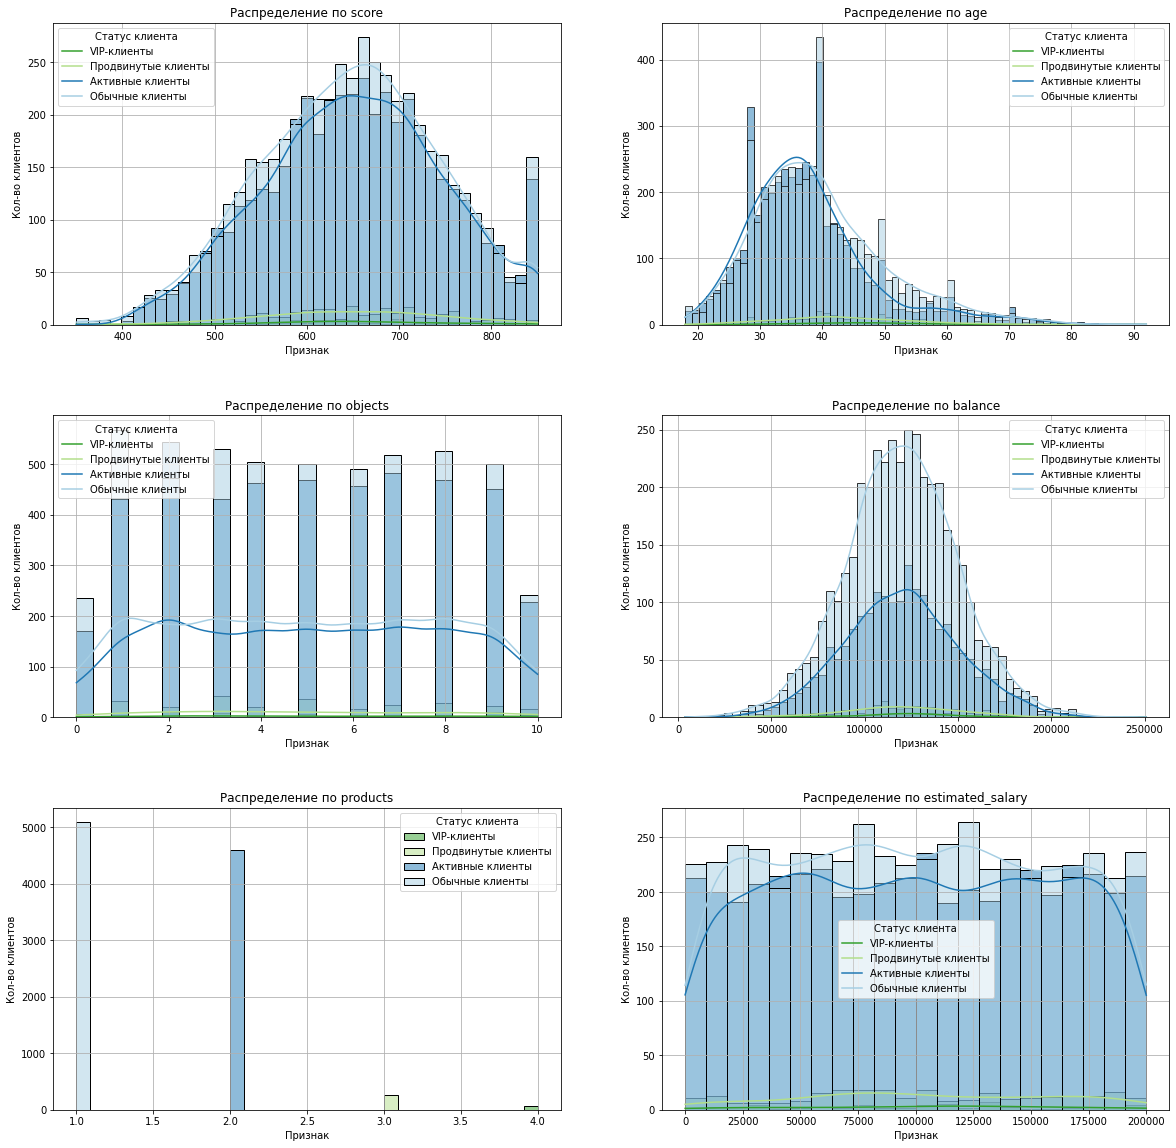

In [151]:
#построим гистограммы распределения методом histplot() для количественных признаков

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
plt.subplots_adjust(hspace=0.3)

for col, ax in zip(df1_s.columns, axs.ravel()):
    hp = sns.histplot(data=data.sort_values(by='products'), x=col, hue='segments', palette="Paired", ax=ax, kde=True)
    hp.legend(title='Статус клиента', labels=['VIP-клиенты', 'Продвинутые клиенты', 'Активные клиенты', 'Обычные клиенты'])
    ax.grid()
    ax.set_title(f'Распределение по {col}')
    ax.set_xlabel('Признак')
    ax.set_ylabel('Кол-во клиентов')

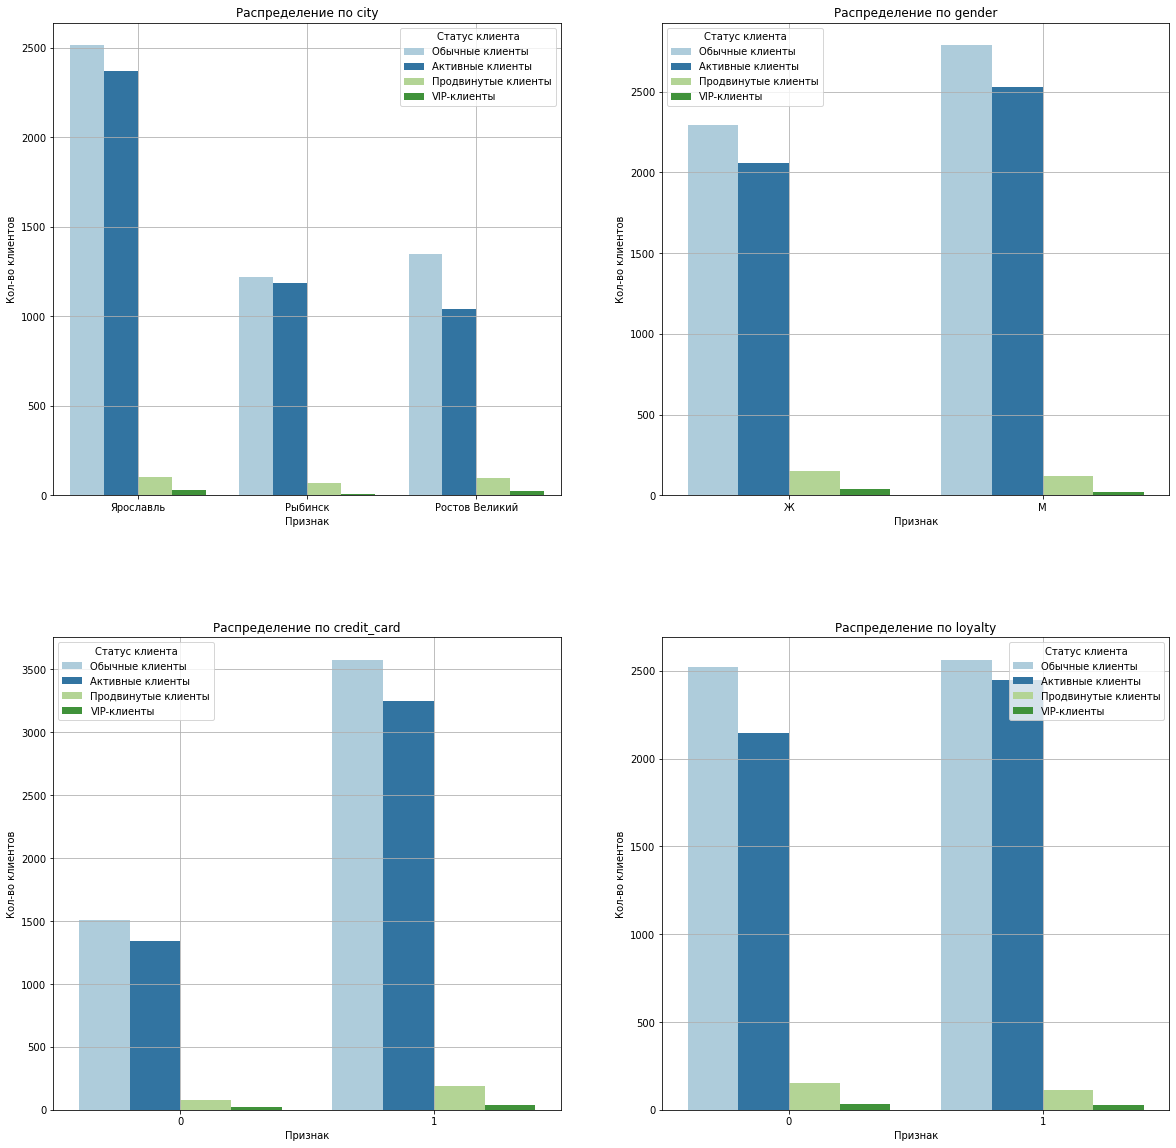

In [152]:
#построим гистограммы распределения методом countplot() для категориальных признаков

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
plt.subplots_adjust(hspace=0.3)

for col, ax in zip(df2_s.columns, axs.ravel()):
    cp = sns.countplot(data=data.sort_values(by='products'), x=col, hue='segments', palette="Paired", ax=ax)
    cp.legend(title='Статус клиента', labels=['Обычные клиенты', 'Активные клиенты', 'Продвинутые клиенты', 'VIP-клиенты'])
    ax.grid()
    ax.set_title(f'Распределение по {col}')
    ax.set_xlabel('Признак')
    ax.set_ylabel('Кол-во клиентов')

#### Вывод

К выводам, приведенным ранее, можно добавить:

* Большинство клиентов по каждому сегменту из г. Ярославль
* Среди Обычных и Активных клиентов больше мужчин, а среди Продвинутых и VIP клинетов - больше женщин.
* Большая часть клинетов по всем сегментам являются обладателями кредитной карты.

### Вывод

* Мы ведилили 4 сегмента клиентов: **Обычные клиенты, Активные клиенты, Продвинутые клиенты и VIP-клиенты.** Основная часть клиентов приходится на сегмент "Обычные клиенты" - 51%, 46% приходится на сегмент "Активные клиенты", 3% приходится на сегмент "Продвинутые клиенты", менее 1% представляет сегмент "VIP-клиенты".

* Методами groupby() и mean() мы построили таблицу со средними значениями признаков и привели краткое описание каждого сегмента:
 * У **VIP - клиентов** наибольший балл кредитного скоринга, наивысший средний возраст, наибольшее кол-во объектов в собственности, самый высокий средний баланс на счете, все клиенты из данного сегмента попали в отток.
 * У **Активных клиентов** самый низкий процент оттока, самый низкий средний возраст и наивысший показатель активных клиентов.
 * У **Обычных клиентов** самый низкий показатель средней заработной платы.
 * У **Продвинутых клиентов** самый низкий балл кредитного скоринга, самый низкий средний баланс на счете, наибольший процент клиентов имеет кредитную карту, самый низкий процент клиентов по активности.

Можно отметить, что довольно значимый для банка сегмент **VIP-клиенты имеет 100% отток**. Это может быть связано с невыгодными условиями (высокой комиссией за пользование продуктами, низкими процентами по вкладам). Также можно предположить, что для данного сегмента в банке осуществляется недостаточно хорошее обслуживание (нет личного менеджера, общий зал ожидания, мало индивидуальных предложений).

* Затем мы построили для качественных и количественных признаков каждого сегмента распределения и дополнили выводы: 
 * Большинство клиентов по каждому сегменту из г. Ярославль
 * Среди Обычных и Активных клиентов больше мужчин, а среди Продвинутых и VIP клинетов - больше женщин.
 * Большая часть клинетов по всем сегментам являются обладателями кредитной карты.

## Проверка гипотезы различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Итак, проверим гипотезу: доход между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним - различается. Сформулируем нулевую и альтернативную гипотезы. Т.к. нам надо проверить различаются ли доход клиентов, то значит доход одного клиента может быть как больше, так и меньше дохода другого, соответственно нам необходимо проверить двустороннюю гипотезу.

**Н0: Средний доход между теми клиентами, которые пользуются двумя продуктами банка, и средний доход между теми, которые пользуются одним, равны**.

**H1: Средний доход между теми клиентами, которые пользуются двумя продуктами банка, и средний доход между теми, которые пользуются одним, не равны**.

Для проверки гипотезы о равенстве средних двух генеральных совокупностей мы будем использовать метод **scipy_stats.ttest_ind()**, который возвращает статистику разности и уровень значимости для этой статистики. Нулевая гипотеза отвергается, если статистика разности довольно большая. Решение будем принимать по **pvalue**.

В качестве **порогового значения примем 5%**.


In [153]:
#создадим две выборки данных, отфильтровав их по кол-ву продуктов, в таблице выведем заработную плату клиентов
one_products = data[data['products']==1]['estimated_salary']
two_products = data[data['products']==2]['estimated_salary'] 

results = st.ttest_ind(one_products,two_products)
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Отвергнуть гипотезу не можем')

0.41047183624949335
Отвергнуть гипотезу не можем


### Вывод

Т.к. pvalue значительно больше 0,05, мы не можем отвергнуть нулевую гипотезу, а значит нет оснований полагать, что средние доходы обеих групп существенно различаются.

## Проверка статистической гипотезы относительно представленных данных.

Итак, проверим гипотезу: средний балл кредитного скоринга у клиентов сегмента "Обычные клиенты" и клиентов сегмента "VIP-клиенты" различается.

Т.к. нам надо проверить различаются ли балл кредитного скоринга клиентов, то значит балл одного клиента может быть как больше, так и меньше балла другого, соответственно нам необходимо проверить двустороннюю гипотезу.

**Н0: Средний балл кредитного скоринга между клиентами сегмента "Обычные клиенты" и средний балл между клиентами сегмента "VIP-клиенты" равны**.

**H1: Средний балл кредитного скоринга между клиентами сегмента "Обычные клиенты" и средний балл между клиентами сегмента "VIP-клиенты" не равны**.

Для проверки гипотезы о равенстве средних двух генеральных совокупностей мы будем использовать метод **scipy_stats.ttest_ind()**, который возвращает статистику разности и уровень значимости для этой статистики. Нулевая гипотеза отвергается, если статистика разности довольно большая. Решение будем принимать по **pvalue**.

В качестве **порогового значения примем 5%**.


In [154]:
#создадим две выборки данных, отфильтровав их по сегментам, в таблице выведем балл кредитного скоринга
score_1 = data[data['segments']=='Обычные клиенты']['score']
score_4 = data[data['segments']=='VIP - клиенты']['score'] 

results = st.ttest_ind(score_1,score_4)
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Отвергнуть гипотезу не можем')

0.7238450338316702
Отвергнуть гипотезу не можем


### Вывод

Т.к. pvalue довольно большое, мы принимаем нулевую гипотезу, соответственно можно сделать вывод, что средние значения скоринга по обеим выборкам не имеют статистически значимых различий.

## Общий вывод

Подведем итоги нашего исследования:

1. Изначально мы подгрузили необходимые для работы библиотеки, прочитали файл и ознакомились с данными. Отметили некорректный стиль в наименовании колонок. Затем мы ознакомились с основной информацией по данным и обнаружили,  что в данных присутствует бинарная замена категориальных признаков.


2. На этапе предобработки данных мы привели названия колонок к нижнему змеинному регистру, проверили данные на наличие  явных и неявных дубликатов, которые в последствии не обнаружили. В колонке balance в ходе проверки данных на пропуски мы обнаружили существенное кол-во пропущенных значений. Мы проанализировали данные в различных разрезах и выяснили, что у клиентов, которые имеют кредитную карту, имеется существенное кол-во пропусков в колонке balance. Можно предположить, что данные клиенты живут засчет кредитки, соответственно на счету отсутствуют средства.


3. Изучив средние значения и стандартные отклонения датасета, мы определили:

 * Средний балл кредитного скоринга составляет **650**
 * Средний возраст клиентов **38 лет**
 * Клиенты банка имеют в среднем **5 объектов собственности**
 * Средний баланс на счетах клиентов **119827**
 * В среднем клиенты банка имеют один продукт
 * Больше, чем у **70%** клиентов имеется кредитная карта
 * **51%** клиентов являются активными
 * В среднем заработная плата клиента составляет **100090**
 * Отток клиентов равен **20%**.


4. Мы сгруппировали данные по оттоку и вывели средние значения признаков. В разрезе по группам пользователей оставшимся и ушедшим можно сделать выводы:

 * У ушедших клиентов средний бал кредитного скоринга ниже, а возраст выше
 * По кол-ву объектов в собственности и количеству продуктов существенной разницы между группами не наблюдается
 * Средний баланс на счете у ушедших клиентов немного выше
 * У **70%** в обеих группам имеется кредитная карта
 * Среди ушедших клиентов всего **36%** являлись активными
 * Средняя заработная плата ушедших клиентов немного выше.


5. Далее мы построили графики распределения по количественным и неколичественным признакам в разрезе ушедших/оставшихся клиентов. Проанализировав графики, мы дополнили выводы о том, что:

 * Возраст большинства ушедших клиентов составляет **40+**
 * Большее кол-во ушедших клиентов имели в банке всего **один продукт**
 * Больше всего ушедших отмечается по **г. Ростов Великий**
 * Ушедших **женщин** больше, чем мужчин

> Можно предположить, что среди ушедших преобладают клиенты более старшего возраста, в связи с тем, что банк возможно ориентирован на более молодую аудиторию. Стоит также задуматься, почему ушедшие клиенты имели всего один продукт, возможно банк предлагает мало продуктов с бесплатным обслуживанием на пробный период. 


6. Мы построили матрицу корреляций, которая показала, что явной зависимости оттока от других признаков не наблюдается. Матрица корреляции, расчитанная методом Спирмена также показывает, что явных взаимосвязей между признаками нет.


7. На основании кол-ва продуктов мы выделили 4 сегмента клиентов: 
 * Обычные клиенты 
 * Активные клиенты
 * Продвинутые клиенты 
 * VIP-клиенты.

Основная часть клиентов **51%** приходится на сегмент **"Обычные клиенты"**, **46%** приходится на сегмент **"Активные клиенты"**, **3%** приходится на сегмент **"Продвинутые клиенты"**, **менее 1%** представляет сегмент **"VIP-клиенты"**.

8. Затем построили таблицу со средними значениями признаков и привели краткое описание каждого сегмента:
 * У **VIP - клиентов** наибольший балл кредитного скоринга, наивысший средний возраст, наибольшее кол-во объектов в собственности, самый высокий средний баланс на счете, все клиенты из данного сегмента попали в отток.
 * У **Активных клиентов** самый низкий процент оттока, самый низкий средний возраст и наивысший показатель активных клиентов.
 * У **Обычных клиентов** самый низкий показатель средней заработной платы.
 * У **Продвинутых клиентов** самый низкий балл кредитного скоринга, самый низкий средний баланс на счете, наибольший процент клиентов имеет кредитную карту, самый низкий процент клиентов по активности.

> Можно отметить, что довольно значимый для банка сегмент **VIP-клиенты имеет 100% отток**. Это может быть связано с невыгодными условиями (высокой комиссией за пользование продуктами, низкими процентами по вкладам). Также можно предположить, что для данного сегмента в банке осуществляется недостаточно хорошее обслуживание (нет личного менеджера, общий зал ожидания, мало индивидуальных предложений).


9. Затем мы построили для качественных и количественных признаков каждого сегмента распределения и дополнили выводы: 
 * Большинство клиентов по каждому сегменту из **г. Ярославль**
 * Среди Обычных и Активных клиентов больше мужчин, а **среди Продвинутых и VIP клинетов - больше женщин**.
 * **Большая часть клиентов** по всем сегментам **являются обладателями кредитной карты**.
 
 
10. В конце мы осуществили проверку статистической гипотезы о том, что доход между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним - различается и выяснили, что у нас нет оснований полагать, что средние значения обеих выборок существенно различаются. Также мы проверили гипотезу касаемо различий среднего балла кредитного скоринга у клиентов сегмента "Обычные клиенты" и среднего балла клиентов сегмента "VIP-клиенты" и пришли к выводу, что средние по обеим выборкам не имеют статистически значимых различий.


**В качестве возможных причин оттока клиентов можно выделить следующие:**

    ✏️ Отстутсвие заинтересованности более зрелых клиентов (40+) в предоставляемых банковских продуктах.
 
    ✏️ Некомфортные условия обслуживания клиентов VIP сегмента.
 
    ✏️ Отсутствие  возможности у клиентов с одним банковским продуктом протестировать новые продукты на выгодных условиях.


## Рекомендации

Исходя из выводов, описанных выше,  в качестве рекомендаций можно выделить следующие:

✔️ Разработать банковские продукты для возрастной категории 40+ (например, пенсионные карты/вклады на особых условиях, повышенный кэшбэк на определенные категории - аптеки, медицинские учреждения).
    
✔️ Проанализировать условия обслуживания VIP-клиентов (имеются ли персональные менеджеры, отдельный комфортный зал ожидания, проанализировать предоставляемые возможности использования онлайн-сервисов для бизнеса).
    
✔️ Разработать промо-акции по тестированию новых продуктов с бесплатным периодом обслуживания, с повышенным процентом/кэшбэком на льготный период.